In [15]:
# 啟動 Chrome 必須先下載 Chrome 驅動器(https://sites.google.com/chromium.org/driver/)
# 將 Chrome 驅動器放置同路徑下，或設定於系統環境變數中的 Path
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from base64 import b64decode
from bs4 import BeautifulSoup
import time

options = Options()
options.add_extension("uBlock-Origin.crx")
driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)

print("Chrome Browser Invoked")

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - Driver [C:\Users\Asus\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache
C:\Users\Asus\AppData\Local\Temp\ipykernel_4856\1632558549.py:17: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)


Chrome Browser Invoked












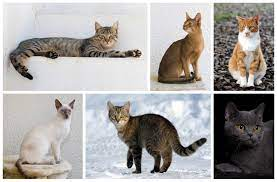
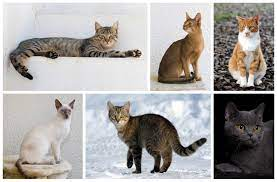
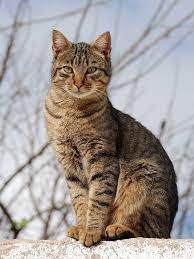
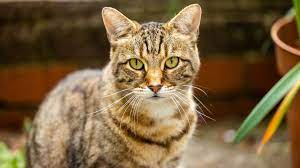
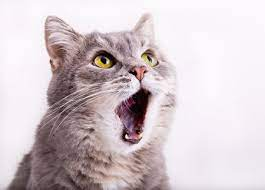
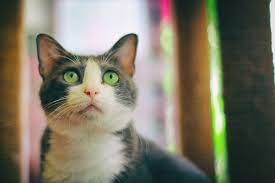
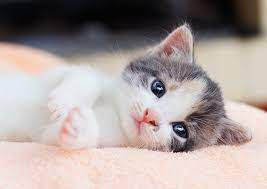
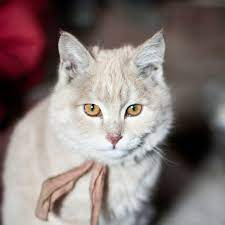
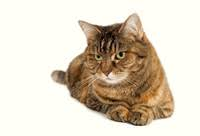

In [16]:
# 開啟新分頁(圖片搜尋頁面)
google_image_url = (
    "https://images.google.com"  # step1: setup url1 you want to visit in new page
)
strScript = 'window.open("' + google_image_url + '");'
driver.execute_script(strScript)
driver.switch_to.window(driver.window_handles[1])
driver.find_element(By.CLASS_NAME, "gLFyf.gsfi").send_keys("cat",Keys.ENTER)
# driver.find_element("Tg7LZd").click()
for i in range(1, 10):
    try:
        driver.find_element(
            By.XPATH,
            f"/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div[1]/div[1]/span/div[1]/div[1]/div[{i}]",
        ).click()
        img = driver.find_element(By.CSS_SELECTOR, "img.n3VNCb")
        src = img.get_attribute("outerHTML")
        print(src)
        # if 'data:image' not in src:
        #     print(src)
        #     break
    except EC.NoSuchElementException:
        break

# image_src = driver.find_element(By.XPATH, '/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[3]/div/a/img').get_attribute('src')
# soup2 = BeautifulSoup(driver.page_source, 'html.parser')
# temp = soup2.find_all('img')
# # temp[3]以前都怪怪的，3以後都可以
# header, encoded = temp[3]["src"].split(",", 1)
# data = b64decode(encoded)

# with open("image.jpg", "wb") as f:
#     f.write(data)

# # 切回原本頁面(遊戲頁面)
# driver.switch_to.window(driver.window_handles[0])
